In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
loan_data = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_2015.csv')

<ipython-input-3-dd8ca3b786ad>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/loan_data_2015.csv')


In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [5]:
loan_data.shape

(421094, 74)

In [6]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

**There are columns with missing values**

In [8]:
total=loan_data.isnull().sum().sort_values(ascending=False)
percent=(loan_data.isnull().sum()/loan_data.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(50)

,total,percent
desc,421049,0.999893
dti_joint,420585,0.998791
annual_inc_joint,420583,0.998786
verification_status_joint,420583,0.998786
il_util,402477,0.955789
mths_since_rcnt_il,400284,0.950581
inq_last_12m,399722,0.949246
total_bal_il,399722,0.949246
open_acc_6m,399722,0.949246
open_il_6m,399722,0.949246


To fill out misisng values of annual income we are going to take the mean income of each zip code and profession and fill teh missing values with corresponding mean income.

In [9]:
loan_data_income_grouped = loan_data.groupby(['zip_code', 'emp_title']).agg({'annual_inc':'mean'}).reset_index()
loan_data_income_grouped

,zip_code,emp_title,annual_inc
0,007xx,Senior Planner,75000.0
1,008xx,Fire Corporal,75000.0
2,008xx,General Manager,45000.0
3,010xx,3rd grade teacher,70000.0
4,010xx,A/V Integration Specialist,100000.0
...,...,...,...
308506,999xx,Support Specialist,32000.0
308507,999xx,Teacher,90000.0
308508,999xx,engineer/deck hand,60000.0
308509,999xx,paraproffessional,21000.0


In [10]:
loan_data_merged = loan_data.merge(
    loan_data_income_grouped,
    on=['zip_code', 'emp_title'],
    how='left',
    suffixes=('', '_mean')
)

loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data_merged['annual_inc_mean'])
loan_data.drop(columns=['annual_inc_mean'], inplace=True, errors='ignore')

In [11]:
loan_data['annual_inc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 421094 entries, 0 to 421093
Series name: annual_inc
Non-Null Count   Dtype  
--------------   -----  
421094 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


Getting the mean annual income by zip_code and profession did not work. Let's try getting the mean annual income only by zip code.

In [12]:
loan_data_income_grouped = loan_data.groupby(['zip_code']).agg({'annual_inc':'mean'}).reset_index()
loan_data_income_grouped

,zip_code,annual_inc
0,007xx,75000.000000
1,008xx,60000.000000
2,010xx,71852.889513
3,011xx,62951.348614
4,012xx,66311.986667
...,...,...
909,995xx,79379.390728
910,996xx,85979.821226
911,997xx,74477.140503
912,998xx,69684.132394


In [13]:
loan_data_merged = loan_data.merge(
    loan_data_income_grouped,
    on=['zip_code'],
    how='left',
    suffixes=('', '_mean')
)

loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data_merged['annual_inc_mean'])
loan_data.drop(columns=['annual_inc_mean'], inplace=True, errors='ignore')

In [14]:
loan_data['annual_inc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 421094 entries, 0 to 421093
Series name: annual_inc
Non-Null Count   Dtype  
--------------   -----  
421094 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


In [15]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '3 years', '4 years', nan,
       '2 years', '8 years', '9 years', '1 year', '6 years', '7 years'],
      dtype=object)

### The other missing values such as -
### earlist_cr_line- if no record of when the credit line first becameavailable, we can assume 0 month since earliest credit line.
### acc_now_delinq - we can assume that the number accounts on which the borrower is now delinquent is 0.
### total_acc - we can assume The total number of credit lines currently in the borrower's credit file is 0.

#### similarly pub_rec (Number of derogatory public records), open_acc(The number of open credit lines in the borrower's credit file), inq_last_6mths (The number of inquiries in past 6 months (excluding auto and mortgage inquiries)), delinq_2yrs(The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years), emp_length (Employment length in years).

**Will convert emp_length from category to int**

In [16]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', '0', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', '0', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('\+', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].replace('', '0')

In [17]:
type(loan_data['emp_length_int'][0])

str

In [18]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [19]:
type(loan_data['emp_length_int'][0])

numpy.float64

We have earliest_cr_line. The month the borrower's earliest reported credit line was opened
We can create how long has it been since the earliest credit line.
Assuming we are in December 2017

In [20]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [21]:
loan_data['mths_since_earliest_cr_line'] = (
    (pd.to_datetime('2017-12-01').year - loan_data['earliest_cr_line_date'].dt.year) * 12 +
    (pd.to_datetime('2017-12-01').month - loan_data['earliest_cr_line_date'].dt.month)
)


In [22]:
loan_data['mths_since_earliest_cr_line'].describe()

,mths_since_earliest_cr_line
count,421094.000000
mean,227.354876
std,98.123989
min,-612.000000
25%,167.000000
50%,212.000000
75%,277.000000
max,587.000000


From the descriptive statistics, we can see that the minimum value is -612. Since the data is upto 2014 and we are assuming that today's date is December 2017, there cannot be any earliest_cr_line after December 2014. Will have a look at how many negative mths_since_earliest_cr_line there are

In [23]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
254,Jan-57,2057-01-01,-469
618,Aug-64,2064-08-01,-560
648,Jul-68,2068-07-01,-607
1808,Jan-65,2065-01-01,-565
2583,Sep-64,2064-09-01,-561
...,...,...,...
418890,Jun-68,2068-06-01,-606
420450,Jan-66,2066-01-01,-577
420642,Sep-68,2068-09-01,-609
420794,Sep-65,2065-09-01,-573


In [24]:
loan_data['mths_since_earliest_cr_line'].max()

587

In [25]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

<ipython-input-25-60169add49d1>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()
<ipython-input-25-60169a

Converting "term" as in loan terms into int.  

In [26]:
loan_data['term'].describe()

,term
count,421094
unique,2
top,36 months
freq,283172


In [27]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [28]:
loan_data['term_int'][0]

' 60'

In [29]:
type(loan_data['term_int'][12])

str

In [30]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term_int'][12]

36

There is the issu_d column which represents on which month the loan was funded. Going to create a feature that represents how long it has been since the loan has been granted.

In [31]:
loan_data['issue_d'].head()

,issue_d
0,Dec-15
1,Dec-15
2,Dec-15
3,Dec-15
4,Dec-15


In [32]:
loan_data['issue_d'].tail()

,issue_d
421089,Jan-15
421090,Jan-15
421091,Jan-15
421092,Jan-15
421093,Jan-15


In [33]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['issue_d_date'].head()

,issue_d_date
0,2015-12-01
1,2015-12-01
2,2015-12-01
3,2015-12-01
4,2015-12-01


In [34]:
loan_data['issue_d_date'].tail()

,issue_d_date
421089,2015-01-01
421090,2015-01-01
421091,2015-01-01
421092,2015-01-01
421093,2015-01-01


In [35]:
loan_data['mths_since_issue_d'] = (
    (pd.to_datetime('2017-12-01').year - loan_data['issue_d_date'].dt.year) * 12 +
    (pd.to_datetime('2017-12-01').month - loan_data['issue_d_date'].dt.month)
)

In [36]:
loan_data['mths_since_issue_d'].describe()

,mths_since_issue_d
count,421094.000000
mean,29.044629
std,3.458162
min,24.000000
25%,26.000000
50%,29.000000
75%,32.000000
max,35.000000


There are different grades of the laons which had been assigned by Lending Club. We would want to analyze if population frma certan loan grade are more prone to not defaulting.

Also would like to create dummy variables for other categorical variables.

In [37]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [38]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [39]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [40]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

**Preparing target variable.**

### The column loan_status has teh following values -
current, fully paid, charged off,late(31-120 days), in grace period, Does not meet the credit policy. Status:Fully Paid, Late (16-30 days), Default, Does not meet the credit policy. Status:Charged Off.

### From here, need to work out which category falls under good (not defaulting on loan) and which categiry fall under bad (defaulting on loan)


In [41]:
loan_data['loan_status'].value_counts()

,count
loan_status,
Current,377553
Fully Paid,22984
Issued,8460
Late (31-120 days),4691
In Grace Period,3107
Charged Off,2773
Late (16-30 days),1139
Default,387


Getting the proportion of each category of loan_status

In [42]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

,count
loan_status,
Current,0.896600
Fully Paid,0.054582
Issued,0.020091
Late (31-120 days),0.011140
In Grace Period,0.007378
Charged Off,0.006585
Late (16-30 days),0.002705
Default,0.000919


In [43]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [44]:
loan_data.shape

(421094, 203)

**Target variable is whether the individual has defaulted or not (not default = 1, default = 0)**

In [45]:
predictors = loan_data.drop('good_bad', axis =1)
target = loan_data['good_bad']

In [46]:
print('Shape of predictor', predictors.shape)
print('Shape of target', target.shape)

Shape of predictor (421094, 202)
Shape of target (421094,)


Calculating WoE to understand the relationship between target and the categories of the variable of interest.
Calculating Information value (IV) to understand the relationship between target and variabel of interest.

In [47]:
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [48]:
df_temp = woe_discrete(predictors, 'grade', target)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2167,0.904015,0.005146,1959.0,208.0,0.004741,0.026493,-1.720744,NaN,NaN,0.633941
1,F,9817,0.930529,0.023313,9135.0,682.0,0.022106,0.086868,-1.368556,0.026514,0.352187,0.633941
2,E,34948,0.956936,0.082993,33443.0,1505.0,0.080928,0.191695,-0.862345,0.026407,0.506211,0.633941
3,D,62654,0.967488,0.148789,60617.0,2037.0,0.146686,0.259457,-0.570298,0.010552,0.292048,0.633941
4,C,120567,0.982541,0.286318,118462.0,2105.0,0.286664,0.268119,0.066882,0.015053,0.637180,0.633941
5,B,117606,0.991097,0.279287,116559.0,1047.0,0.282059,0.133359,0.749074,0.008557,0.682192,0.633941
6,A,73335,0.996359,0.174154,73068.0,267.0,0.176816,0.034008,1.648502,0.005262,0.899428,0.633941


Plotting the WoE

In [49]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']

    plt.figure(figsize=(18, 6))

    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')

    plt.xlabel(df_WoE.columns[0])

    plt.ylabel('Weight of Evidence')

    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))

    plt.xticks(rotation = rotation_of_x_axis_labels)


**Grade A and grade B have higher percentage of "good" outcomes.**

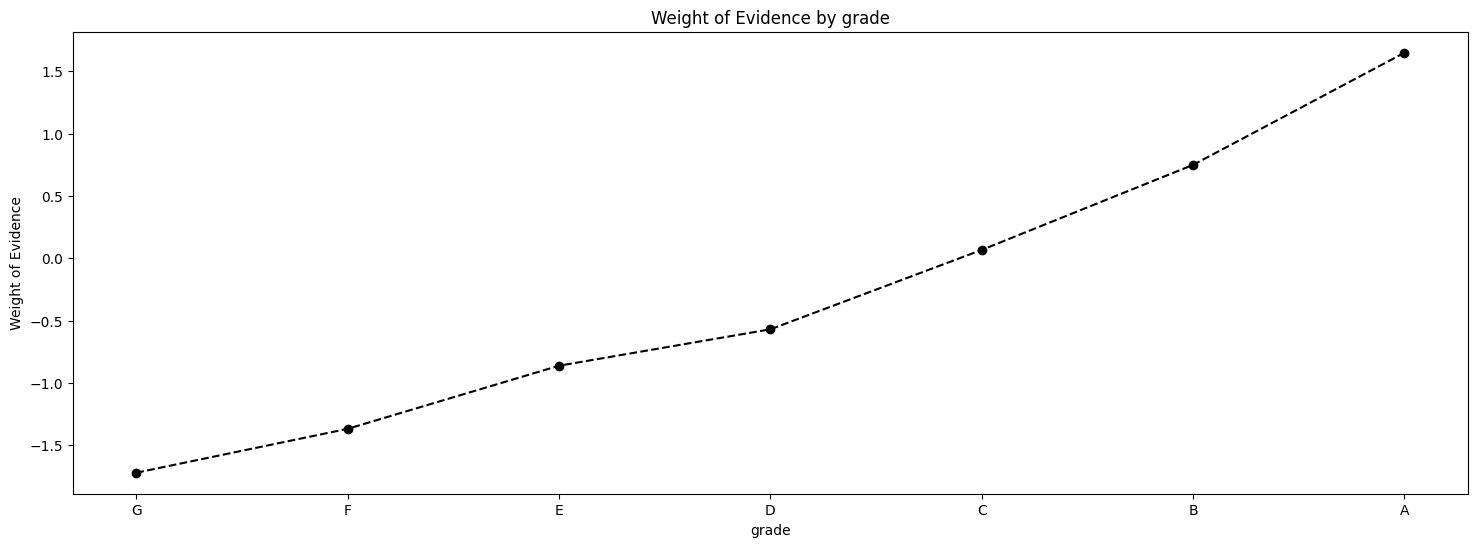

In [50]:
plot_by_woe(df_temp)

In [51]:
predictors['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,207682
RENT,167644
OWN,45766
ANY,2


In [52]:
df_temp = woe_discrete(predictors, 'home_ownership', target)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,167644,0.976933,0.398115,163777.0,3867.0,0.396321,0.492549,-0.217368,NaN,NaN,inf
1,OWN,45766,0.980750,0.108684,44885.0,881.0,0.108616,0.112215,-0.032594,0.003817,0.184775,inf
2,MORTGAGE,207682,0.985059,0.493196,204579.0,3103.0,0.495057,0.395236,0.225190,0.004309,0.257784,inf
3,ANY,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,0.014941,inf,inf


**Those who have a Mortgage have a higher % of good outcomes. Those who own a house have equal % of good and bad outcomes.**

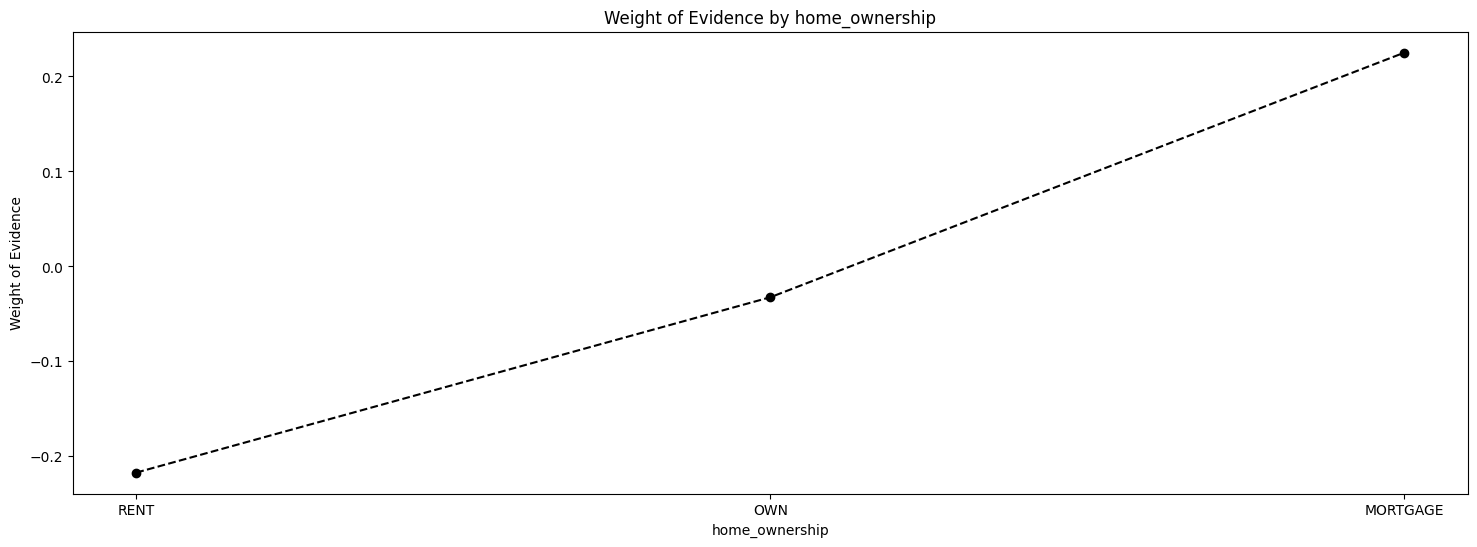

In [53]:
plot_by_woe(df_temp)

Rent, None, Other category have negative WoE meaning there is higher % of bad outcomes. There is only 1 person belong to "ANY" category.

There is only a small numbe rof observations for Other, None,Any as indicated by prop_n_obs from above.

The other riskiest category is RENT. Combining Rent, Other, None, Any together.

In [54]:
predictors['home_ownership:RENT_OTHER_NONE_ANY'] = sum([predictors['home_ownership:RENT'],
                                                      predictors['home_ownership:ANY']])

In [55]:
predictors['addr_state'].unique()

array(['DC', 'IN', 'KS', 'IL', 'OR', 'VA', 'PA', 'GA', 'TN', 'OH', 'NY',
       'FL', 'NJ', 'RI', 'NC', 'AL', 'TX', 'SC', 'MD', 'WA', 'MO', 'MN',
       'NH', 'VT', 'AZ', 'MI', 'MA', 'CA', 'LA', 'DE', 'NM', 'CO', 'WI',
       'SD', 'CT', 'NE', 'HI', 'AR', 'MT', 'WV', 'WY', 'OK', 'NV', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK'], dtype=object)

In [56]:
predictors['addr_state'].value_counts()

,count
addr_state,
CA,58067
TX,34699
NY,33844
FL,29298
IL,16864
NJ,15195
PA,14969
OH,14394
GA,14110


In [57]:
df_temp = woe_discrete(predictors, 'addr_state', target)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NV,5924,0.969953,0.014068,5746.0,178.0,0.013905,0.022672,-0.488919,NaN,NaN,inf
1,SD,835,0.970060,0.001983,810.0,25.0,0.001960,0.003184,-0.485236,0.000107,0.003683,inf
2,HI,2083,0.973596,0.004947,2028.0,55.0,0.004908,0.007005,-0.355923,0.003536,0.129314,inf
3,OK,3968,0.976310,0.009423,3874.0,94.0,0.009375,0.011973,-0.244647,0.002715,0.111276,inf
4,AK,954,0.977987,0.002266,933.0,21.0,0.002258,0.002675,-0.169512,0.001677,0.075135,inf
5,NY,33844,0.978253,0.080372,33108.0,736.0,0.080118,0.093746,-0.157095,0.000266,0.012417,inf
6,AL,5347,0.978306,0.012698,5231.0,116.0,0.012658,0.014775,-0.154627,0.000052,0.002467,inf
7,UT,2836,0.978491,0.006735,2775.0,61.0,0.006715,0.007770,-0.145863,0.000185,0.008765,inf
8,WY,900,0.978889,0.002137,881.0,19.0,0.002132,0.002420,-0.126776,0.000398,0.019086,inf
9,FL,29298,0.979111,0.069576,28686.0,612.0,0.069417,0.077952,-0.115963,0.000222,0.010814,inf


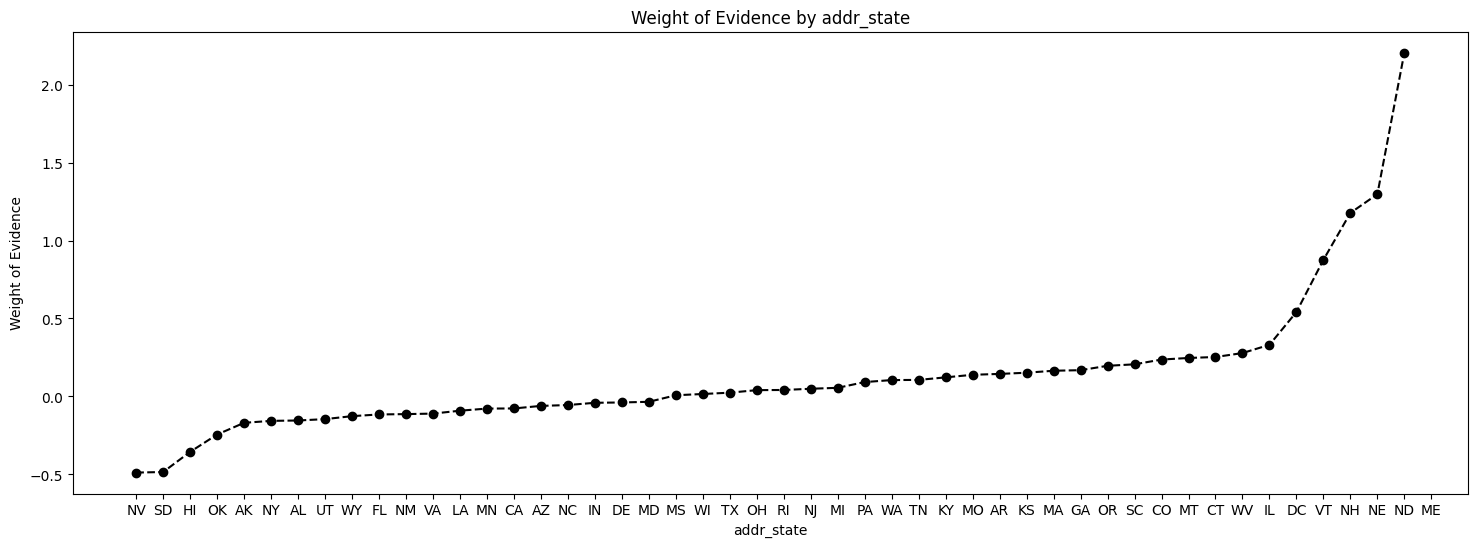

In [58]:
plot_by_woe(df_temp)

NE and IA has low WoE and ME has high WoE. From the descriptive statistics above, there are very low number of observations in those categories.

It is likely that the low number of observations is teh reason for their extreme WoE values.

No data from North Dakota (ND). Going to add a category for ND in case there are borrowers from there later.

In [59]:
if ['addr_state:ND'] in predictors.columns.values:
    pass
else:
    predictors['addr_state:ND'] = 0

In [60]:
if ['addr_state:ID'] in predictors.columns.values:
    pass
else:
    predictors['addr_state:ID'] = 0

In [61]:
if ['addr_state:IA'] in predictors.columns.values:
    pass
else:
    predictors['addr_state:IA'] = 0

In [62]:
predictors['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([predictors['addr_state:ND'], predictors['addr_state:NE'],
                                              predictors['addr_state:IA'], predictors['addr_state:NV'],
                                              predictors['addr_state:FL'],
                                                          predictors['addr_state:AL']])

predictors['addr_state:NM_VA'] = sum([predictors['addr_state:NM'], predictors['addr_state:VA']])

predictors['addr_state:OK_TN_MO_LA_MD_NC'] = sum([predictors['addr_state:OK'], predictors['addr_state:TN'],
                                              predictors['addr_state:MO'], predictors['addr_state:LA'],
                                              predictors['addr_state:MD'], predictors['addr_state:NC']])

predictors['addr_state:UT_KY_AZ_NJ'] = sum([predictors['addr_state:UT'], predictors['addr_state:KY'],
                                              predictors['addr_state:AZ'], predictors['addr_state:NJ']])

predictors['addr_state:AR_MI_PA_OH_MN'] = sum([predictors['addr_state:AR'], predictors['addr_state:MI'],
                                              predictors['addr_state:PA'], predictors['addr_state:OH'],
                                              predictors['addr_state:MN']])

predictors['addr_state:RI_MA_DE_SD_IN'] = sum([predictors['addr_state:RI'], predictors['addr_state:MA'],
                                              predictors['addr_state:DE'], predictors['addr_state:SD'],
                                              predictors['addr_state:IN']])

predictors['addr_state:GA_WA_OR'] = sum([predictors['addr_state:GA'], predictors['addr_state:WA'],
                                              predictors['addr_state:OR']])

predictors['addr_state:WI_MT'] = sum([predictors['addr_state:WI'], predictors['addr_state:MT']])

predictors['addr_state:IL_CT'] = sum([predictors['addr_state:IL'], predictors['addr_state:CT']])

predictors['addr_state:KS_SC_CO_VT_AK_MS'] = sum([predictors['addr_state:KS'], predictors['addr_state:SC'],
                                              predictors['addr_state:CO'], predictors['addr_state:VT'],
                                              predictors['addr_state:AK'], predictors['addr_state:MS']])

predictors['addr_state:WV_NH_WY_DC_ME_ID'] = sum([predictors['addr_state:WV'], predictors['addr_state:NH'],
                                              predictors['addr_state:WY'], predictors['addr_state:DC'],
                                              predictors['addr_state:ME'], predictors['addr_state:ID']])

In [63]:
df_temp = woe_discrete(predictors, 'verification_status', target)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,123016,0.976532,0.292134,120129.0,2887.0,0.290698,0.367724,-0.235047,NaN,NaN,0.046808
1,Source Verified,179565,0.981110,0.426425,176173.0,3392.0,0.426318,0.432047,-0.013348,0.004578,0.221698,0.046808
2,Not Verified,118513,0.986736,0.281441,116941.0,1572.0,0.282984,0.200229,0.345926,0.005626,0.359274,0.046808


Cases where income source has not been verified has higher % of good outcomes.
Cases where income source has been verified has lower % of goodoutcomes.
This is counter intuitive

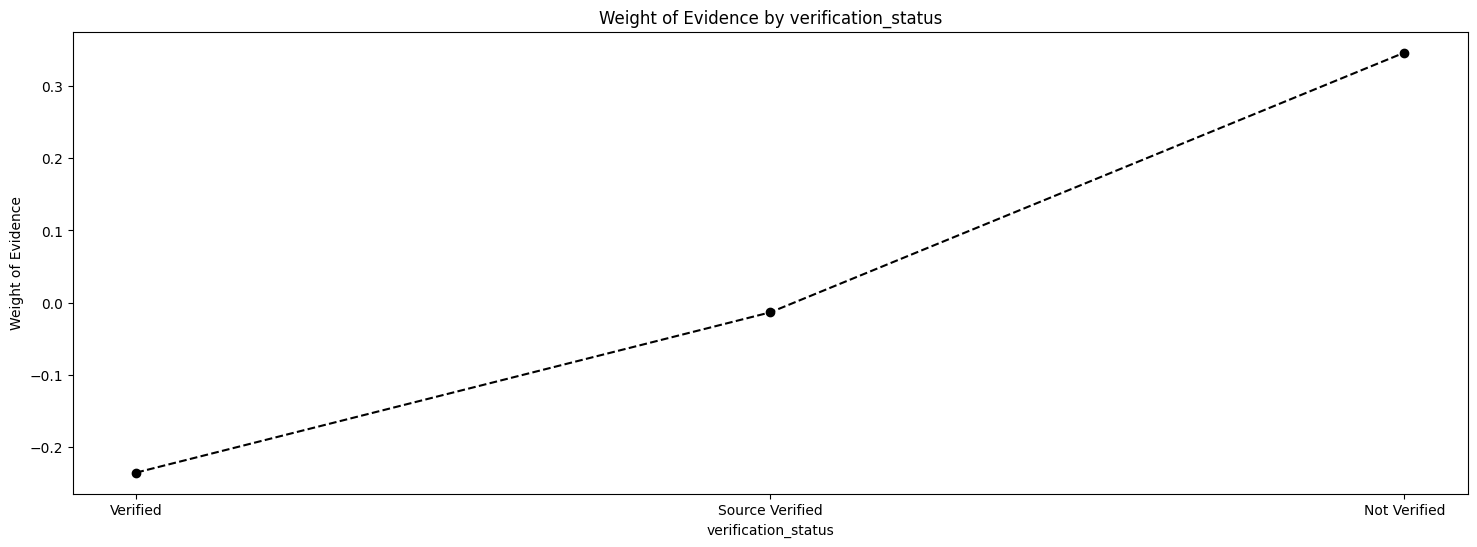

In [64]:
plot_by_woe(df_temp)

In [65]:
df_temp = woe_discrete(predictors, 'purpose', target)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,wedding,4,0.750000,0.000009,3.0,1.0,0.000007,0.000127,-2.864783,NaN,NaN,inf
1,renewable_energy,224,0.955357,0.000532,214.0,10.0,0.000518,0.001274,-0.900004,0.205357,1.964779,inf
2,small_business,3364,0.958680,0.007989,3225.0,139.0,0.007804,0.017705,-0.819181,0.003323,0.080823,inf
3,moving,2420,0.965289,0.005747,2336.0,84.0,0.005653,0.010699,-0.638016,0.006609,0.181164,inf
4,house,1438,0.967316,0.003415,1391.0,47.0,0.003366,0.005986,-0.575764,0.002026,0.062252,inf
5,medical,3938,0.970797,0.009352,3823.0,115.0,0.009251,0.014648,-0.459536,0.003482,0.116228,inf
6,major_purchase,7449,0.975970,0.017690,7270.0,179.0,0.017593,0.022800,-0.259269,0.005173,0.200267,inf
7,other,19204,0.976672,0.045605,18756.0,448.0,0.045387,0.057063,-0.228919,0.000702,0.030350,inf
8,vacation,2249,0.977768,0.005341,2199.0,50.0,0.005321,0.006369,-0.179660,0.001096,0.049259,inf
9,debt_consolidation,250020,0.979878,0.593739,244989.0,5031.0,0.592845,0.640810,-0.077800,0.002110,0.101860,inf


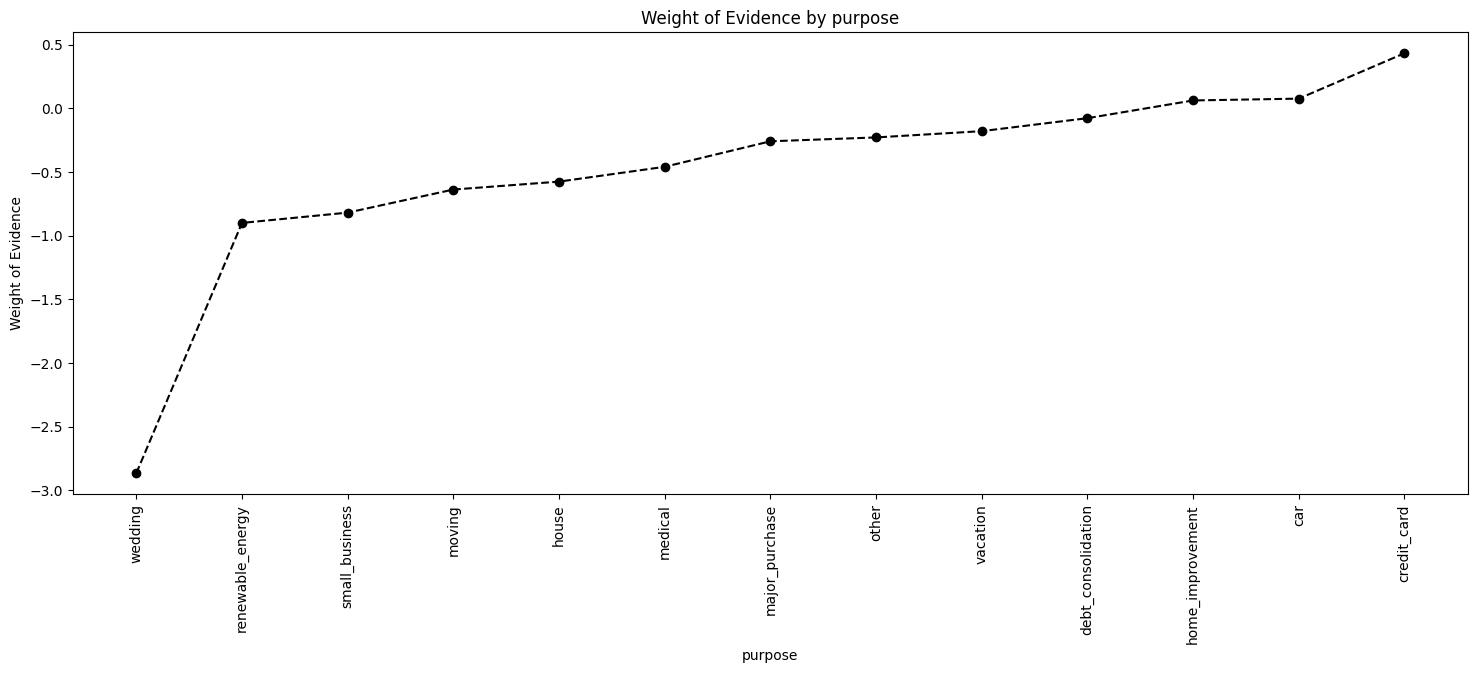

In [66]:
plot_by_woe(df_temp, 90)

In [67]:
predictors['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([predictors['purpose:educational'], predictors['purpose:small_business'],
                                                                 predictors['purpose:wedding'], predictors['purpose:renewable_energy'],
                                                                 predictors['purpose:moving'], predictors['purpose:house']])
predictors['purpose:oth__med__vacation'] = sum([predictors['purpose:other'], predictors['purpose:medical'],
                                             predictors['purpose:vacation']])
predictors['purpose:major_purch__car__home_impr'] = sum([predictors['purpose:major_purchase'], predictors['purpose:car'],
                                                        predictors['purpose:home_improvement']])

**Now processing continuous variables**

In [68]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [69]:
predictors['term_int'].unique()

array([60, 36])

In [70]:
df_temp = woe_ordered_continuous(predictors, 'term_int', target)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,283172,0.983533,0.672467,278509.0,4663.0,0.673959,0.593937,0.126396,NaN,NaN,0.027678
1,60,137922,0.976885,0.327533,134734.0,3188.0,0.326041,0.406063,-0.219486,0.006647,0.345883,0.027678


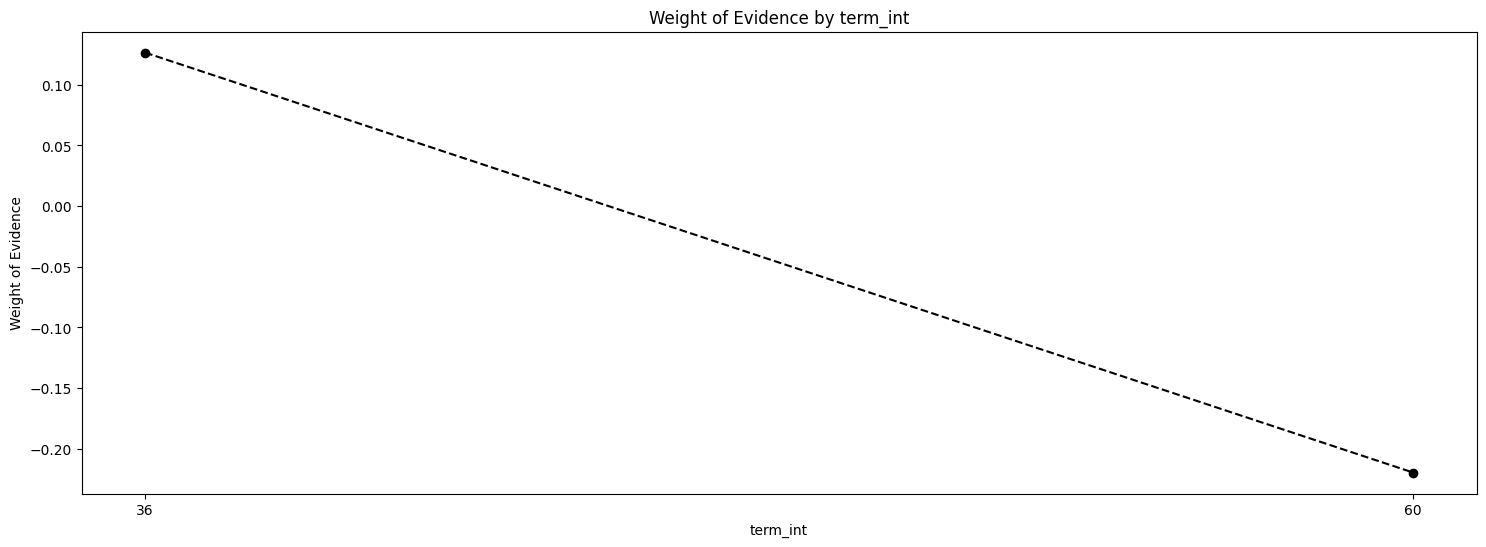

In [71]:
plot_by_woe(df_temp)

In [72]:
predictors['term:36'] = np.where((predictors['term_int'] == 36), 1, 0)
predictors['term:60'] = np.where((predictors['term_int'] == 60), 1, 0)

In [73]:
predictors['emp_length_int'].value_counts()

,count
emp_length_int,
10.0,141520
2.0,37497
0.0,34340
3.0,33430
1.0,27473
5.0,24930
4.0,24506
8.0,21560
7.0,18414


In [74]:
df_temp = woe_ordered_continuous(predictors, 'emp_length_int', target)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,34340,0.978130,0.086438,33589.0,751.0,0.086132,0.102778,-0.176689,NaN,NaN,0.017433
1,1.0,27473,0.977687,0.069153,26860.0,613.0,0.068877,0.083892,-0.197208,0.000443,0.020520,0.017433
2,2.0,37497,0.980932,0.094385,36782.0,715.0,0.094320,0.097851,-0.036756,0.003245,0.160453,0.017433
3,3.0,33430,0.980975,0.084148,32794.0,636.0,0.084094,0.087040,-0.034435,0.000043,0.002321,0.017433
4,4.0,24506,0.979678,0.061685,24008.0,498.0,0.061564,0.068154,-0.101695,0.001297,0.067260,0.017433
5,5.0,24930,0.980866,0.062752,24453.0,477.0,0.062705,0.065280,-0.040245,0.001188,0.061449,0.017433
6,6.0,16838,0.978976,0.042384,16484.0,354.0,0.042270,0.048447,-0.136388,0.001890,0.096143,0.017433
7,7.0,18414,0.979201,0.046351,18031.0,383.0,0.046237,0.052415,-0.125424,0.000224,0.010964,0.017433
8,8.0,21560,0.983905,0.054269,21213.0,347.0,0.054396,0.047489,0.135808,0.004705,0.261232,0.017433
9,9.0,16769,0.982289,0.042210,16472.0,297.0,0.042239,0.040646,0.038448,0.001617,0.097360,0.017433


In [75]:
predictors['emp_length:0'] = np.where(predictors['emp_length_int'].isin([0]), 1, 0)
predictors['emp_length:1'] = np.where(predictors['emp_length_int'].isin([1]), 1, 0)
predictors['emp_length:2-4'] = np.where(predictors['emp_length_int'].isin(range(2, 5)), 1, 0)
predictors['emp_length:5-6'] = np.where(predictors['emp_length_int'].isin(range(5, 7)), 1, 0)
predictors['emp_length:7-9'] = np.where(predictors['emp_length_int'].isin(range(7, 10)), 1, 0)
predictors['emp_length:10'] = np.where(predictors['emp_length_int'].isin([10]), 1, 0)

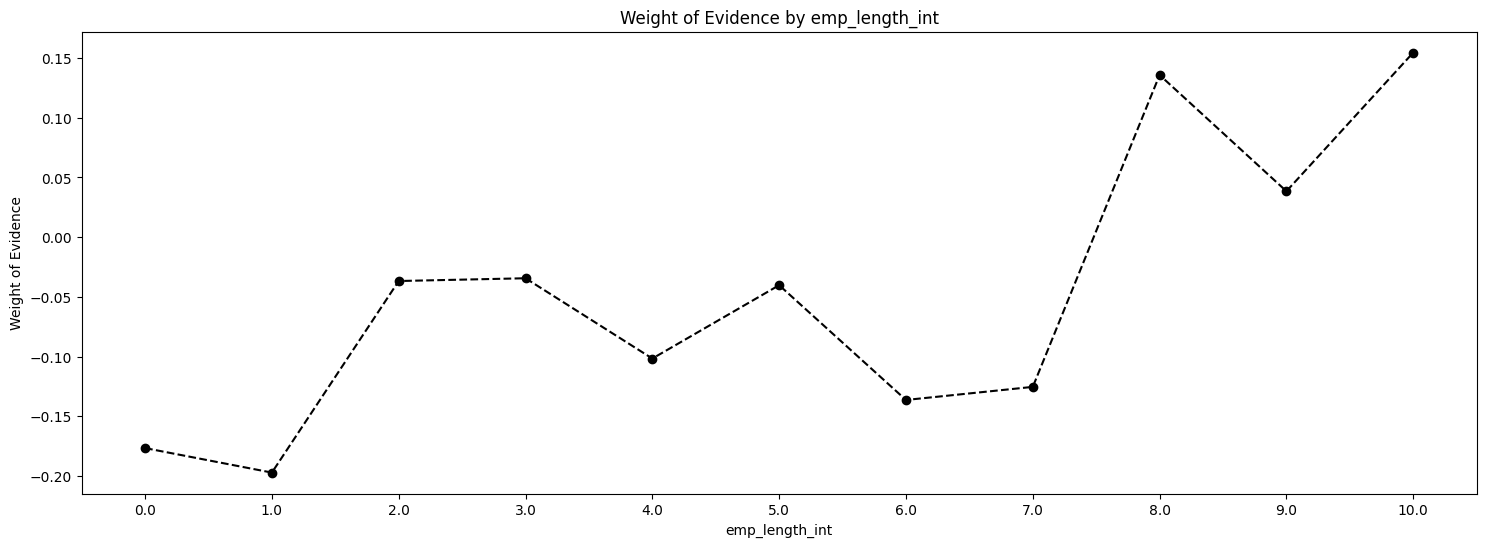

In [76]:
plot_by_woe(df_temp)

In [77]:
predictors['emp_length:0'] = np.where(predictors['emp_length_int'].isin([0]), 1, 0)
predictors['emp_length:1'] = np.where(predictors['emp_length_int'].isin([1]), 1, 0)
predictors['emp_length:2-4'] = np.where(predictors['emp_length_int'].isin(range(2, 5)), 1, 0)
predictors['emp_length:5-6'] = np.where(predictors['emp_length_int'].isin(range(5, 7)), 1, 0)
predictors['emp_length:7-9'] = np.where(predictors['emp_length_int'].isin(range(7, 10)), 1, 0)
predictors['emp_length:10'] = np.where(predictors['emp_length_int'].isin([10]), 1, 0)

In [78]:
predictors['mths_since_issue_d'].unique()

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], dtype=int32)

In [79]:
predictors['mths_since_issue_d_factor'] = pd.cut(predictors['mths_since_issue_d'], 50)

In [80]:
predictors['mths_since_issue_d_factor']

,mths_since_issue_d_factor
0,"(23.989, 24.22]"
1,"(23.989, 24.22]"
2,"(23.989, 24.22]"
3,"(23.989, 24.22]"
4,"(23.989, 24.22]"
...,...
421089,"(34.78, 35.0]"
421090,"(34.78, 35.0]"
421091,"(34.78, 35.0]"
421092,"(34.78, 35.0]"


In [81]:
df_temp = woe_ordered_continuous(predictors, 'mths_since_issue_d_factor', target)
df_temp

<ipython-input-68-d60b6f4ebf9c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
<ipython-input-68-d60b6f4ebf9c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(23.989, 24.22]",44342,1.000000,0.105302,44342.0,0.0,0.107302,0.000000,inf,NaN,NaN,inf
1,"(24.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(24.44, 24.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(24.66, 24.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(24.88, 25.1]",37530,0.998082,0.089125,37458.0,72.0,0.090644,0.009171,2.290915,NaN,NaN,inf
5,"(25.1, 25.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(25.32, 25.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(25.54, 25.76]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(25.76, 25.98]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(25.98, 26.2]",48631,0.997327,0.115487,48501.0,130.0,0.117367,0.016558,1.958410,NaN,NaN,inf


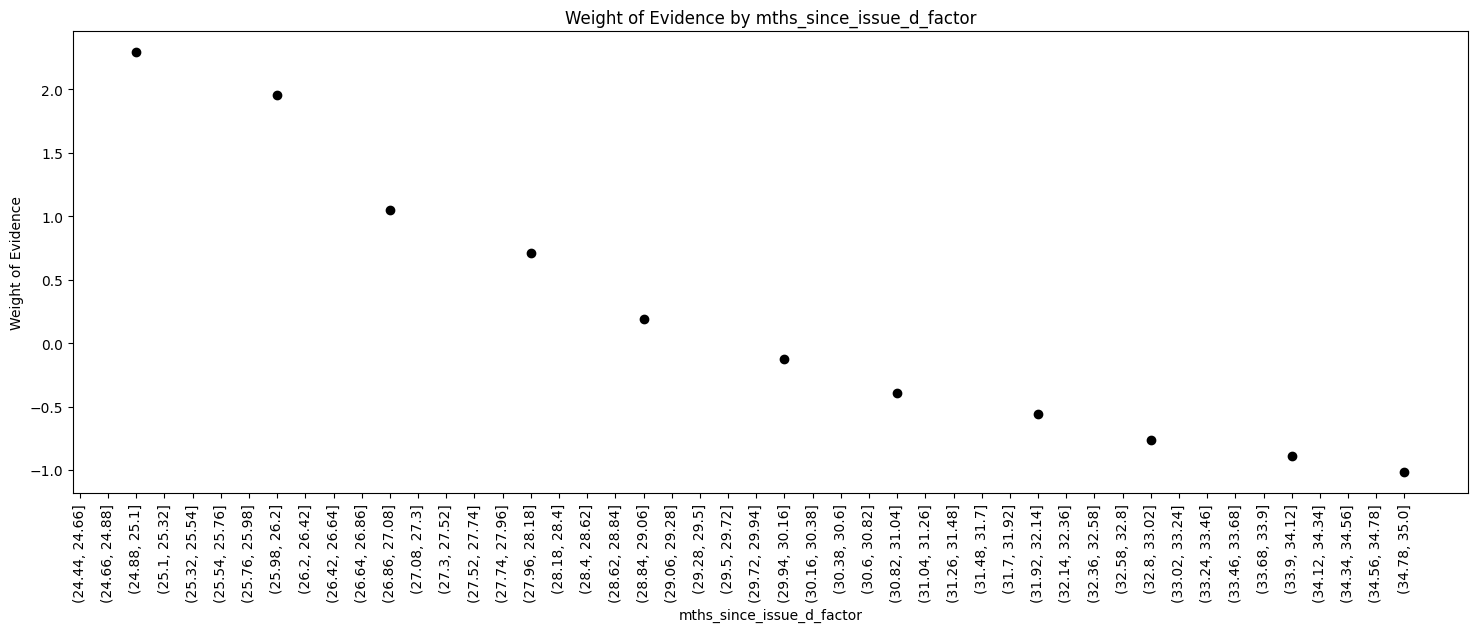

In [82]:
plot_by_woe(df_temp, 90)

**Months Since the loan had been issued**

In [83]:
predictors['mths_since_issue_d:<38'] = np.where(predictors['mths_since_issue_d'].isin(range(38)), 1, 0)
predictors['mths_since_issue_d:38-39'] = np.where(predictors['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
predictors['mths_since_issue_d:40-41'] = np.where(predictors['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
predictors['mths_since_issue_d:42-48'] = np.where(predictors['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
predictors['mths_since_issue_d:49-52'] = np.where(predictors['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
predictors['mths_since_issue_d:53-64'] = np.where(predictors['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
predictors['mths_since_issue_d:65-84'] = np.where(predictors['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
predictors['mths_since_issue_d:>84'] = np.where(predictors['mths_since_issue_d'].isin(range(85, int(predictors['mths_since_issue_d'].max()))), 1, 0)

**## For the other variables, skipping the WOE and IV part and going to the grouping part as it can be doen the same way**

In [84]:
predictors['int_rate:<9.548'] = np.where((predictors['int_rate'] <= 9.548), 1, 0)
predictors['int_rate:9.548-12.025'] = np.where((predictors['int_rate'] > 9.548) & (predictors['int_rate'] <= 12.025), 1, 0)
predictors['int_rate:12.025-15.74'] = np.where((predictors['int_rate'] > 12.025) & (predictors['int_rate'] <= 15.74), 1, 0)
predictors['int_rate:15.74-20.281'] = np.where((predictors['int_rate'] > 15.74) & (predictors['int_rate'] <= 20.281), 1, 0)
predictors['int_rate:>20.281'] = np.where((predictors['int_rate'] > 20.281), 1, 0)

**Months since the credit line became available for the person**

In [85]:
predictors['mths_since_earliest_cr_line:<140'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
predictors['mths_since_earliest_cr_line:141-164'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
predictors['mths_since_earliest_cr_line:165-247'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
predictors['mths_since_earliest_cr_line:248-270'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
predictors['mths_since_earliest_cr_line:271-352'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
predictors['mths_since_earliest_cr_line:>352'] = np.where(predictors['mths_since_earliest_cr_line'].isin(range(353, int(predictors['mths_since_earliest_cr_line'].max()))), 1, 0)

In [86]:
predictors['delinq_2yrs:0'] = np.where((predictors['delinq_2yrs'] == 0), 1, 0)
predictors['delinq_2yrs:1-3'] = np.where((predictors['delinq_2yrs'] >= 1) & (predictors['delinq_2yrs'] <= 3), 1, 0)
predictors['delinq_2yrs:>=4'] = np.where((predictors['delinq_2yrs'] >= 9), 1, 0)

In [87]:
predictors['inq_last_6mths:0'] = np.where((predictors['inq_last_6mths'] == 0), 1, 0)
predictors['inq_last_6mths:1-2'] = np.where((predictors['inq_last_6mths'] >= 1) & (predictors['inq_last_6mths'] <= 2), 1, 0)
predictors['inq_last_6mths:3-6'] = np.where((predictors['inq_last_6mths'] >= 3) & (predictors['inq_last_6mths'] <= 6), 1, 0)
predictors['inq_last_6mths:>6'] = np.where((predictors['inq_last_6mths'] > 6), 1, 0)

In [88]:
predictors['open_acc:0'] = np.where((predictors['open_acc'] == 0), 1, 0)
predictors['open_acc:1-3'] = np.where((predictors['open_acc'] >= 1) & (predictors['open_acc'] <= 3), 1, 0)
predictors['open_acc:4-12'] = np.where((predictors['open_acc'] >= 4) & (predictors['open_acc'] <= 12), 1, 0)
predictors['open_acc:13-17'] = np.where((predictors['open_acc'] >= 13) & (predictors['open_acc'] <= 17), 1, 0)
predictors['open_acc:18-22'] = np.where((predictors['open_acc'] >= 18) & (predictors['open_acc'] <= 22), 1, 0)
predictors['open_acc:23-25'] = np.where((predictors['open_acc'] >= 23) & (predictors['open_acc'] <= 25), 1, 0)
predictors['open_acc:26-30'] = np.where((predictors['open_acc'] >= 26) & (predictors['open_acc'] <= 30), 1, 0)
predictors['open_acc:>=31'] = np.where((predictors['open_acc'] >= 31), 1, 0)

In [89]:
predictors['pub_rec:0-2'] = np.where((predictors['pub_rec'] >= 0) & (predictors['pub_rec'] <= 2), 1, 0)
predictors['pub_rec:3-4'] = np.where((predictors['pub_rec'] >= 3) & (predictors['pub_rec'] <= 4), 1, 0)
predictors['pub_rec:>=5'] = np.where((predictors['pub_rec'] >= 5), 1, 0)

In [90]:
predictors['total_acc:<=27'] = np.where((predictors['total_acc'] <= 27), 1, 0)
predictors['total_acc:28-51'] = np.where((predictors['total_acc'] >= 28) & (predictors['total_acc'] <= 51), 1, 0)
predictors['total_acc:>=52'] = np.where((predictors['total_acc'] >= 52), 1, 0)

In [91]:
predictors['acc_now_delinq:0'] = np.where((predictors['acc_now_delinq'] == 0), 1, 0)
predictors['acc_now_delinq:>=1'] = np.where((predictors['acc_now_delinq'] >= 1), 1, 0)

In [92]:
predictors['total_rev_hi_lim:<=5K'] = np.where((predictors['total_rev_hi_lim'] <= 5000), 1, 0)
predictors['total_rev_hi_lim:5K-10K'] = np.where((predictors['total_rev_hi_lim'] > 5000) & (predictors['total_rev_hi_lim'] <= 10000), 1, 0)
predictors['total_rev_hi_lim:10K-20K'] = np.where((predictors['total_rev_hi_lim'] > 10000) & (predictors['total_rev_hi_lim'] <= 20000), 1, 0)
predictors['total_rev_hi_lim:20K-30K'] = np.where((predictors['total_rev_hi_lim'] > 20000) & (predictors['total_rev_hi_lim'] <= 30000), 1, 0)
predictors['total_rev_hi_lim:30K-40K'] = np.where((predictors['total_rev_hi_lim'] > 30000) & (predictors['total_rev_hi_lim'] <= 40000), 1, 0)
predictors['total_rev_hi_lim:40K-55K'] = np.where((predictors['total_rev_hi_lim'] > 40000) & (predictors['total_rev_hi_lim'] <= 55000), 1, 0)
predictors['total_rev_hi_lim:55K-95K'] = np.where((predictors['total_rev_hi_lim'] > 55000) & (predictors['total_rev_hi_lim'] <= 95000), 1, 0)
predictors['total_rev_hi_lim:>95K'] = np.where((predictors['total_rev_hi_lim'] > 95000), 1, 0)

In [93]:
predictors['annual_inc:<20K'] = np.where((predictors['annual_inc'] <= 20000), 1, 0)
predictors['annual_inc:20K-30K'] = np.where((predictors['annual_inc'] > 20000) & (predictors['annual_inc'] <= 30000), 1, 0)
predictors['annual_inc:30K-40K'] = np.where((predictors['annual_inc'] > 30000) & (predictors['annual_inc'] <= 40000), 1, 0)
predictors['annual_inc:40K-50K'] = np.where((predictors['annual_inc'] > 40000) & (predictors['annual_inc'] <= 50000), 1, 0)
predictors['annual_inc:50K-60K'] = np.where((predictors['annual_inc'] > 50000) & (predictors['annual_inc'] <= 60000), 1, 0)
predictors['annual_inc:60K-70K'] = np.where((predictors['annual_inc'] > 60000) & (predictors['annual_inc'] <= 70000), 1, 0)
predictors['annual_inc:70K-80K'] = np.where((predictors['annual_inc'] > 70000) & (predictors['annual_inc'] <= 80000), 1, 0)
predictors['annual_inc:80K-90K'] = np.where((predictors['annual_inc'] > 80000) & (predictors['annual_inc'] <= 90000), 1, 0)
predictors['annual_inc:90K-100K'] = np.where((predictors['annual_inc'] > 90000) & (predictors['annual_inc'] <= 100000), 1, 0)
predictors['annual_inc:100K-120K'] = np.where((predictors['annual_inc'] > 100000) & (predictors['annual_inc'] <= 120000), 1, 0)
predictors['annual_inc:120K-140K'] = np.where((predictors['annual_inc'] > 120000) & (predictors['annual_inc'] <= 140000), 1, 0)
predictors['annual_inc:>140K'] = np.where((predictors['annual_inc'] > 140000), 1, 0)

In [94]:
predictors['mths_since_last_delinq:Missing'] = np.where((predictors['mths_since_last_delinq'].isnull()), 1, 0)
predictors['mths_since_last_delinq:0-3'] = np.where((predictors['mths_since_last_delinq'] >= 0) & (predictors['mths_since_last_delinq'] <= 3), 1, 0)
predictors['mths_since_last_delinq:4-30'] = np.where((predictors['mths_since_last_delinq'] >= 4) & (predictors['mths_since_last_delinq'] <= 30), 1, 0)
predictors['mths_since_last_delinq:31-56'] = np.where((predictors['mths_since_last_delinq'] >= 31) & (predictors['mths_since_last_delinq'] <= 56), 1, 0)
predictors['mths_since_last_delinq:>=57'] = np.where((predictors['mths_since_last_delinq'] >= 57), 1, 0)

In [95]:
predictors['dti:<=1.4'] = np.where((predictors['dti'] <= 1.4), 1, 0)
predictors['dti:1.4-3.5'] = np.where((predictors['dti'] > 1.4) & (predictors['dti'] <= 3.5), 1, 0)
predictors['dti:3.5-7.7'] = np.where((predictors['dti'] > 3.5) & (predictors['dti'] <= 7.7), 1, 0)
predictors['dti:7.7-10.5'] = np.where((predictors['dti'] > 7.7) & (predictors['dti'] <= 10.5), 1, 0)
predictors['dti:10.5-16.1'] = np.where((predictors['dti'] > 10.5) & (predictors['dti'] <= 16.1), 1, 0)
predictors['dti:16.1-20.3'] = np.where((predictors['dti'] > 16.1) & (predictors['dti'] <= 20.3), 1, 0)
predictors['dti:20.3-21.7'] = np.where((predictors['dti'] > 20.3) & (predictors['dti'] <= 21.7), 1, 0)
predictors['dti:21.7-22.4'] = np.where((predictors['dti'] > 21.7) & (predictors['dti'] <= 22.4), 1, 0)
predictors['dti:22.4-35'] = np.where((predictors['dti'] > 22.4) & (predictors['dti'] <= 35), 1, 0)
predictors['dti:>35'] = np.where((predictors['dti'] > 35), 1, 0)

<ipython-input-95-49b05c56d3d3>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['dti:3.5-7.7'] = np.where((predictors['dti'] > 3.5) & (predictors['dti'] <= 7.7), 1, 0)
<ipython-input-95-49b05c56d3d3>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['dti:7.7-10.5'] = np.where((predictors['dti'] > 7.7) & (predictors['dti'] <= 10.5), 1, 0)
<ipython-input-95-49b05c56d3d3>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

In [96]:
predictors['mths_since_last_record:Missing'] = np.where((predictors['mths_since_last_record'].isnull()), 1, 0)
predictors['mths_since_last_record:0-2'] = np.where((predictors['mths_since_last_record'] >= 0) & (predictors['mths_since_last_record'] <= 2), 1, 0)
predictors['mths_since_last_record:3-20'] = np.where((predictors['mths_since_last_record'] >= 3) & (predictors['mths_since_last_record'] <= 20), 1, 0)
predictors['mths_since_last_record:21-31'] = np.where((predictors['mths_since_last_record'] >= 21) & (predictors['mths_since_last_record'] <= 31), 1, 0)
predictors['mths_since_last_record:32-80'] = np.where((predictors['mths_since_last_record'] >= 32) & (predictors['mths_since_last_record'] <= 80), 1, 0)
predictors['mths_since_last_record:81-86'] = np.where((predictors['mths_since_last_record'] >= 81) & (predictors['mths_since_last_record'] <= 86), 1, 0)
predictors['mths_since_last_record:>86'] = np.where((predictors['mths_since_last_record'] > 86), 1, 0)

<ipython-input-96-9b64072304f0>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['mths_since_last_record:Missing'] = np.where((predictors['mths_since_last_record'].isnull()), 1, 0)
<ipython-input-96-9b64072304f0>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictors['mths_since_last_record:0-2'] = np.where((predictors['mths_since_last_record'] >= 0) & (predictors['mths_since_last_record'] <= 2), 1, 0)
<ipython-input-96-9b64072304f0>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

In [97]:
loan_data_inputs= predictors

In [98]:
loan_data_concat = pd.concat([predictors, target], axis = 1)

In [99]:
loan_data_concat.shape

(421094, 313)

In [100]:
loan_data_concat.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ID,addr_state:IA,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_li

In [101]:
# loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data_concat.drop('good_bad', axis = 1), loan_data[['good_bad']])

In [102]:
# print('loan_data_inputs_train', loan_data_inputs_train.shape)
# print('loan_data_inputs_test', loan_data_inputs_test.shape)
# print('loan_data_targets_train', loan_data_targets_train.shape)
# print('loan_data_targets_test', loan_data_targets_test.shape)

In [103]:
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')

In [104]:
# loan_data_inputs_train.to_csv('/content/drive/My Drive/loan_data_inputs_train.csv', index=False)
# loan_data_inputs_test.to_csv('/content/drive/My Drive/loan_data_inputs_test.csv', index=False)
# loan_data_targets_train.to_csv('/content/drive/My Drive/loan_data_targets_train.csv', index=False)
# loan_data_targets_test.to_csv('/content/drive/My Drive/loan_data_targets_test.csv', index=False)

In [105]:
loan_data_inputs_2015 = loan_data_concat.drop(['good_bad','mths_since_last_record:>86'], axis = 1)
loan_data_inputs_2015.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ID,addr_state:IA,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_li

In [106]:
loan_data_targets_2015 = loan_data_concat[['good_bad']]
loan_data_targets_2015.head(2)

,good_bad
0,1
1,1


In [107]:
loan_data_inputs_2015.shape

(421094, 311)

In [108]:
loan_data_targets_2015.shape

(421094, 1)

In [109]:
# loan_data_inputs_2015.to_csv('/content/drive/My Drive/loan_data_inputs_2015.csv', index=False)

In [110]:
# loan_data_targets_2015.to_csv('/content/drive/My Drive/loan_data_targets_2015.csv', index=False)

In [111]:
inputs_train_with_ref_cat = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/inputs_train_with_ref_cat.csv')

In [112]:
inputs_2015_with_ref_cat = loan_data_inputs_2015.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

In [113]:
inputs_train_with_ref_cat.shape

(349713, 100)

In [114]:
inputs_2015_with_ref_cat.shape

(421094, 100)

In [115]:
inputs_train_with_ref_cat.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
       'addr_state:NM_VA', 'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 'addr_state:WI_MT',
       'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS',
       'addr_state:WV_NH_WY_DC_ME_ID', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:educ__sm_b__wedd__ren_en__mov__house', 'purpose:credit_card',
       'purpose:debt_consolidation', 'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'initial_list_status:f',
       'initial_list_status:w', 'term:36', 'term:60', 'emp_length:0',
       'emp_length:1', 'emp_len

In [116]:
inputs_2015_with_ref_cat.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'home_ownership:OWN',
       'home_ownership:MORTGAGE', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
       'addr_state:NM_VA', 'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 'addr_state:WI_MT',
       'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS',
       'addr_state:WV_NH_WY_DC_ME_ID', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:educ__sm_b__wedd__ren_en__mov__house', 'purpose:credit_card',
       'purpose:debt_consolidation', 'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'initial_list_status:f',
       'initial_list_status:w', 'term:36', 'term:60', 'emp_length:0',
       'emp_length:1', 'emp_len

Want to calculate the PSI not only for the original independent variable from the PD model but also for its outcome: The credit score,

Need to score both teh data used to build teh PD model and the new data

Have already scored the test data. Can use that code to score these 2 dataframes too.

In [117]:
df_scorecard = pd.read_csv('/content/drive/MyDrive/Credit_Risk_Modeling/df_scorecard.csv')

In [118]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.413792,NaN,Intercept,342.964823,343.0
1,1,grade:A,0.886496,1.394511e-20,grade,77.388618,77.0
2,2,grade:B,0.703237,2.963267e-28,grade,61.390628,61.0
3,3,grade:C,0.502003,2.271999e-17,grade,43.823440,44.0
4,4,grade:D,0.335799,2.311380e-09,grade,29.314303,29.0
...,...,...,...,...,...,...,...
96,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
97,13,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
98,14,dti:>35,0.000000,NaN,dti,0.000000,0.0
99,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


Multiply the dummy variables of each dataframe by the scores from the scorecard.

In [119]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [120]:
inputs_2015_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
0,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,0,0,0,0,False,0,0,1,False,True,False,0,False,False,0,1,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,True,False,False,0,True,False,0,0,False,True,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,False,False,True,False,False,False,False,1,False,False,0,0,False,0,False,0,0,0,0,0,False,0,1,0,False,True,False,0,False,True,0,0,False,True,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1,False,False,True,False,False,False,False,1,False,False,0,0,False,0,False,0,0,1,0,0,False,0,0,0,True,False,False,0,False,True,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,False,True,False,False,False,False,False,0,False,True,0,0,False,0,False,0,0,0,0,0,False,1,0,0,True,False,False,0,False,False,0,1,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,1,False,True,False,False,False,False,False,1,False,False,0,0,False,0,True,0

Ordering the features of this daatframe in the same way the feature names from the the scorecard dataframe is ordered.

In [121]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept.astype({col: 'int64' for col in inputs_2015_with_ref_cat_w_intercept.select_dtypes(include='bool').columns})


In [122]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [123]:
inputs_2015_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
421090,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
421091,1,0,0,0,1,0,0,0,

In [124]:
# inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept.astype({col: 'int64' for col in inputs_2015_with_ref_cat_w_intercept.select_dtypes(include='bool').columns})


In [125]:
inputs_2015_with_ref_cat_w_intercept.head(2)

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [126]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [127]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [128]:
inputs_train_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349708,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
349709,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
349710,1,0,0,1,0,0,0,0,

In [129]:
# inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept.astype({col: 'int64' for col in inputs_train_with_ref_cat_w_intercept.select_dtypes(include='bool').columns})


In [130]:
inputs_train_with_ref_cat_w_intercept.head(2)

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [131]:
scorecard_scores = df_scorecard['Score - Preliminary']
scorecard_scores = scorecard_scores.values.reshape(101, 1)
scorecard_scores.shape

(101, 1)

In [132]:
inputs_train_with_ref_cat_w_intercept.shape

(349713, 101)

In [133]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_train.head(2)

,0
0,569.0
1,669.0


In [134]:
y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_2015

,0
0,743.0
1,758.0
2,620.0
3,610.0
4,703.0
...,...
421089,643.0
421090,692.0
421091,530.0
421092,544.0


In [135]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis = 1)

In [136]:
inputs_2015_with_ref_cat_w_intercept.head(2)

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2,0
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,743.0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,758.0


In [137]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
# inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'

In [138]:
inputs_2015_with_ref_cat_w_intercept.rename(
    columns={inputs_2015_with_ref_cat_w_intercept.columns[-1]: 'Score'},
    inplace=True
)

In [139]:
inputs_2015_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2,Score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,743.0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,758.0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,620.0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,610.0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421089,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,643.0
421090,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1

In [140]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# Creating dummy variables for score intervals in the dataframe with old ("expected").

In [141]:
inputs_2015_with_ref_cat_w_intercept.columns

Index(['Intercept', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E',
       'grade:F', 'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA',
       ...
       'mths_since_issue_d:>84', 'int_rate:>20.281',
       'mths_since_earliest_cr_line:<140', 'inq_last_6mths:>6',
       'acc_now_delinq:0', 'annual_inc:<20K', 'dti:>35',
       'mths_since_last_delinq:0-3', 'mths_since_last_record:0-2', 'Score'],
      dtype='object', length=102)

In [142]:
inputs_2015_with_ref_cat_w_intercept['Score']

,Score
0,743.0
1,758.0
2,620.0
3,610.0
4,703.0
...,...
421089,643.0
421090,692.0
421091,530.0
421092,544.0


In [143]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# Creating dummy variables for score intervals in the dataframe with new ("actual").

## Population Stability Index: Calculation and Interpretation

For calculating PSI want to know what proportion of the population came from which dummy variable.

In [144]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]

In [145]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]

In [146]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)

In [147]:
PSI_calc = PSI_calc.reset_index()

In [148]:
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]

In [149]:
PSI_calc

,index,0,1,Original feature name
0,Intercept,1.000000,1.000000,Intercept
1,grade:A,0.160254,0.174154,grade
2,grade:B,0.294178,0.279287,grade
3,grade:C,0.268620,0.286318,grade
4,grade:D,0.164961,0.148789,grade
...,...,...,...,...
108,Score:600-650,0.211130,0.276223,Score
109,Score:650-700,0.114305,0.224936,Score
110,Score:700-750,0.049063,0.195947,Score
111,Score:750-800,0.006008,0.054406,Score


In [150]:
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']

In [151]:
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]

In [152]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]
# Removinng the rows with values in the 'index' column 'Intercept' and 'Score'.

In [153]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# Calculating the contribution of each dummy variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, appling the PSI formula for each contribution.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [154]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()
# Finally, summing all contributions for each original independent variable and the 'Score' variable.

,Contribution
Original feature name,
Score,1.170479
acc_now_delinq,0.000862
addr_state,0.003710
annual_inc,0.005589
dti,0.078291
emp_length,0.005977
grade,0.006739
home_ownership,0.004291
initial_list_status,0.331874


Score reflecting PSI of greater than 0.

1 indicates that there is huge difference in respect to the outcomes obtained by the model.

The new dataset varies from the original population by 2 independent variables (mths_since_issue_d, initial_list_status) and the outcome of the PD model.

For both the variables the difference may not be due to the change in characteristics of the borrowers themselves.
A considerable change in the coefficient can be expected for those 2 variables BUT NOT THE REST.

The population also differ with respect to the estimated credit scores.  

The whole model needs to be trained again by including the new population in the training dataset.
